<a href="https://colab.research.google.com/github/AAROHSINHA/NATURAL-LANGUAGE-PROCESSING/blob/main/NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NEURAL NETWORKS - INTRODUCTION**

### ***What are neural networks ?***
Neural Networks are machine learning algorithms inspired by the structure and functioning of the human brain. Just like the brain consists of billions of interconnected biological neurons, artificial neural networks consist of layers of interconnected artificial neurons (or nodes). These neurons are organized into an input layer, one or more hidden layers, and an output layer. Each neuron receives input, applies a weighted sum and bias, passes the result through an activation function, and sends the output to the next layer — allowing the network to learn complex patterns through training and backpropagation. *We will learn about the working of neural networks in detail. Then this definition will be more and more clear.*

This is an outline image of a neural network -

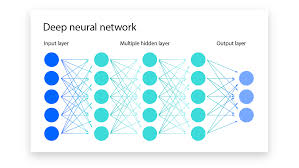

### ***3 Layers of a neural networks***
There are 3 main layers in a neural network architecture -
1. Input Layer (Takes in the input data)
2. Hidden Layers (Multiple layers that do computation on the data to attain information)
3. Output Layer (Final layer that outputs the probability/values)

Each layer consists of Neurons.

### ***What are Neurons?***
Neurons or nodes are basically functions. They attain data from the input layer or the neurons of the previous layers. Each neuron has its own weight and bias which it adjusts in accordance to the data. Then it passes the entire data which is -

`z = w1x1 + w2x2 + w3x3.....`

into an activation function before passing into the next layer.
> * THE NEURON CONTAINS TWO FUNCTIONS - `(1) PRE-ACTIVATION FUNCTION` and `(2) ACTIVATION FUNCTION`. The preactivation function aggregates the inputs with weights and biases and the activation function such as `RelU`, `tanh` or `sigmoid` adds non-linearity (which is kinda the selling point of neural nets) to the data.

### ***How is data passed into the next layer***
Each layer consists of certain number of neurons. Each neuron does its part of computation on the data and passes it to all the next layerd neurons.

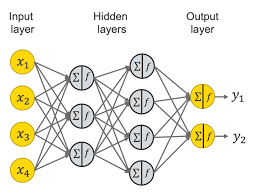


See how x1 and x2 pass the data to the subsequent layer neurons. In the end these accumulate at the output layer to provide the predictions

## **OUR GOALS -**
In this notebook we aim to -
1. Learn the basic theory of Neural Networks (Not too complicated)
2. Learn about forward propogation and back propogation
3. Create models and feed them the MNIST hand-written digit dataset.
4. Create the best neural network model and attain best accuracies on the dataset

Let's download the dataset

In [ ]:
from datetime import datetime
now = datetime.now()
formatted = now.strftime("%Y-%m-%d %H:%M:%S")
print("This notebook was last run on - :", formatted)

This notebook was last run on - : 2025-07-31 19:47:04


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
'''
1. torchvision.datasets is a collection of standatd dataset provided by pytorch's torchvision library
2. transform is a module from torchvision used to define image preprocessing steps.
It is used for many things such as normalizing, cropping or converting to Tensors
Here we want to use it to convert dataset into tensors
3. DataLoader helps us to batch shuffle and load data efficiently
'''

"\n1. torchvision.datasets is a collection of standatd dataset provided by pytorch's torchvision library\n2. transform is a module from torchvision used to define image preprocessing steps.\nIt is used for many things such as normalizing, cropping or converting to Tensors\nHere we want to use it to convert dataset into tensors\n3. DataLoader helps us to batch shuffle and load data efficiently\n"

In [ ]:
# Defining the transform to convert image to Tensors
transform = transforms.ToTensor() # This will convert each image to tensors

# Downloading and loading the train dataset
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               download=True,
                               transform=transform)
# Downloading and loading the test dataset
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              download=True,
                              transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.11MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.84MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.83MB/s]


In [ ]:
# Let's see how the data is
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
## Visualizing the dataset
def show_samples(dataset = train_dataset):
  train_loader = DataLoader(dataset, batch_size=6, shuffle=True)

  # Get a batch
  images, labels = next(iter(train_loader))
  # iter creates an iterator that allows iterations to happen on batches of data
  # next allows us to get the next batch of data. Suppose we run this in a loop,
  # if we don't use next, what will happen is that we will get the same datas.
  # To get new and next, we use next()

  # Plotting
  plt.figure(figsize=(10, 2))
  for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(images[i][0], cmap="gray")
    plt.title(f"Label : {labels[i].item()}")
    plt.axis("off")
  plt.tight_layout()
  plt.show()

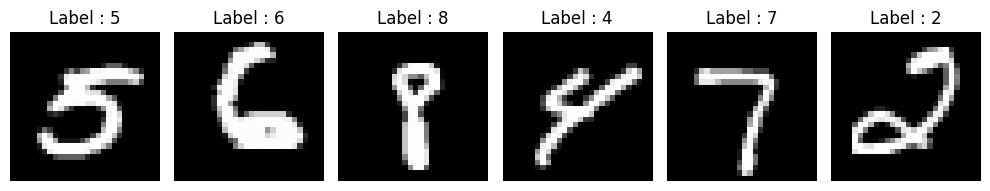

In [ ]:
show_samples()

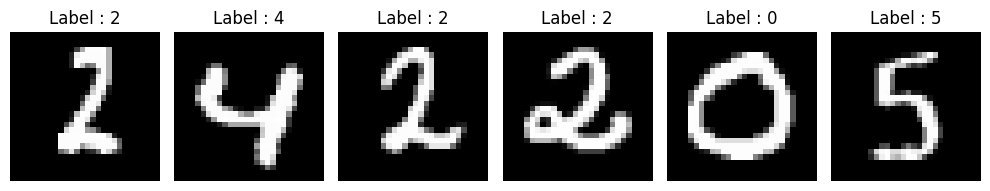

In [ ]:
show_samples()

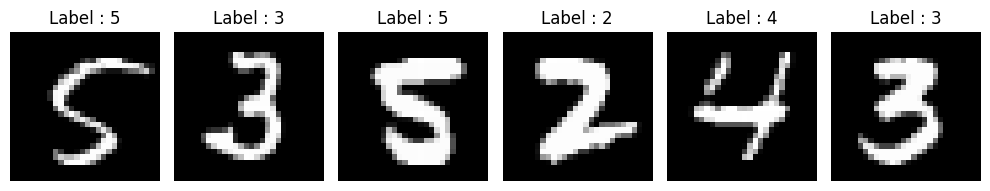

In [ ]:
show_samples(test_dataset)

## **1. PERCEPTRON**
So before using the neural networks we will implement the simplest and one of the earliest Neural Networks - The Perceptron. It is the simplest type of neural networks which acts as an fundamental block for other complex models.
> A perceptron takes multiple binary or real-valued inputs, applies weights to them, sums them up along with a bias term, and passes the result through an activation function to produce a binary output.

### BASIC WORKING OF A PERCEPTRON -
1. Input - The single perceptron takes in the input data. The input data is basically the characterstics information of the label.
2. Weights - Each characterstic/feature/column is assigned a weight. We start from a random weight or a 0 weight and improve in each iteration.
3. Summation - The weighted sum of all these inputs are taken.

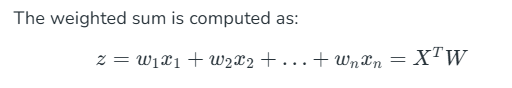
4. Heavside Step Function - The summation is passed through the Heaveside step function.

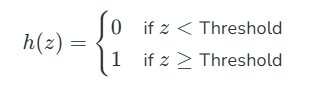
5. Bias - A bias is added. It helps perceptron adjust its input to be little independent of the data. Improves flexibility
6. Learning Loop - The perceptron runs for `n` iterations. In each iteration we alter the weights and bias according to the perceptron learning rule.

#### ***1.1 - PERCEPTRON WITH NUMPY***

In [ ]:
import numpy as np
a = np.zeros(5)
a[1:].T

array([0., 0., 0., 0.])

In [ ]:
import numpy as np
class Perceptron:
  def __init__(self, num_inputs, learning_rate = 0.01):
    self.learning_rate = learning_rate
    self.weights = np.zeros(num_inputs + 1)

  # the summation function - the first linear layer
  def linear(self, x_data):
    z = x_data @ self.weights[1:].T + self.weights[0]
    return z

  # Heaveside step function
  def heavside_step(self, sums):
    if sums >= 0: return 1
    else: return 0

  # predict
  def predict(self, x_data):
    Z = self.linear(x_data)
    try:
      pred = []
      for z in Z:
        pred.append(self.heavside_step(z))
    except:
      return self.heavside_step(Z)
    return pred

  # training the model
  def train(self, inputs, target):
    predictions = self.predict(inputs)
    errors = predictions - target
    self.weights[1:] += self.learning_rate * errors * inputs
    self.weights[0] += self.learning_rate * errors

  # fit
  def fit(self, X, y, num_epochs=100):
    for epoch in range(num_epochs):
      for inputs, target in zip(X, y):
        self.train(inputs, target)



In [ ]:
# Making in the random data
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

Accuracy: 0.975


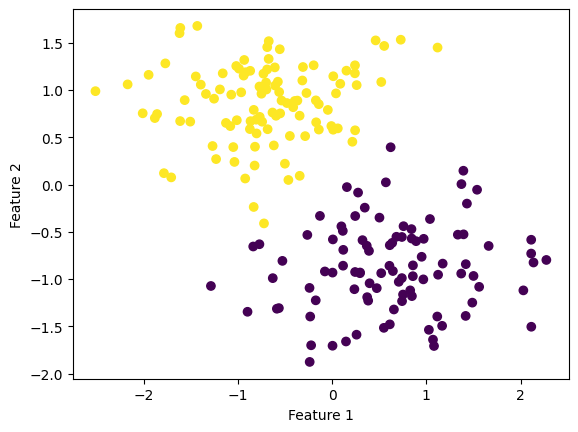

In [ ]:
# Making predictions with the basic model
# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

So we see that we get an accuracy of 97.5 on this simple dataset which is ofcourse seperable. Let's try making the same model using pytorch

#### ***1.2 Perceptron using Pytorch***
**Let's also build the perceptron using pytorch so as to build intution with pytorch too. Which we just learnt recently..**

> class Perceptron(`nn.Module`)
* The nn.Module is the base class in Pytorch.
* It is the fundamental building block.
* It gives access to all the functionality present in pytorch to build Neural Networks (or called graphs)
* Encapsulation: It encapsulates the trainable parameters (weights and biases) of a layer or a complete model, along with the logic for forward propagation.

> `self.linear = nn.Linear(num_inputs, 1)`
*This layer performs the operation:
>
> 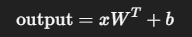
>
> * It computes a linear transformation of the input.
> * It includes weights and bias, both of which are learnable parameters.
> * `layer = nn.Linear(3, 1)` means input of 3 features and output of 1
> * During training, PyTorch automatically updates the weights and biases of this layer when you call .backward() and optimizer.step(). Means we dont need to do something like this generally -
>
> 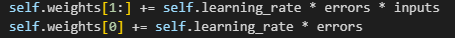
> * But anyway for learning, we will manually override

In [ ]:
import torch
import torch.nn as nn

# Data
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

class Perceptron(nn.Module):
  def __init__(self, num_inputs):
    super(Perceptron, self).__init__()
    self.linear = nn.Linear(num_inputs, 1)

  # Step function
  def heaviside_step_function(self, Z):
    Class = []
    for z in Z:
      if z >= 0:
        Class.append(1)
      else:
        Class.append(0)
    return torch.Tensor(Class)

  # Forward Function
  def forward(self, X):
    Z = self.linear(X)
    return self.heaviside_step_function(Z)

# Loss function we will use in Perceptron's training Loop
def loss(y_pred, y_true):
  return y_pred - y_true

# Initializing the perceptron model
perceptron = Perceptron(num_inputs = X_train.shape[1])
learning_rate = 0.01

# Training Loop - Training the perceptron on training data :
num_epochs = 25
for epoch in range(num_epochs):
  Losses = 0
  for Input, Class in zip(X_train, y_train):
    predicted_class = perceptron(Input)
    error = loss(predicted_class, Class)
    Losses += error

    # Model parameters updation
    w = perceptron.linear.weight
    b = perceptron.linear.bias

    w = w - learning_rate*error*Input
    b = b - learning_rate*error

    perceptron.linear.weight = nn.Parameter(w)
    perceptron.linear.bias = nn.Parameter(b)

# Now that the perceptron is trained. Let's test on it
# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

Accuracy on Test Dataset: 0.9900000095367432


## **2. NEURAL NETWORKS**
Now we are going to cover the entire theory of Neural Networks.
> **THE NEED FOR NEURAL NETWORKS AND DEEP LEARNING:** The main need arises is due to how the convenitonal ML models handle big data. Most of ML models fail or don't perform well on big data whereas Deep learning algorithms do

*Neural Networks are deep learning algorithms that are designed to replicate the human brains. They are complex structure that have different layers such as input layer, output layer and the hidden layers. Each layers consists n number of neurons which perform non linear advance computations on the data. The data passes through INPUT LAYER -> HIDDEN LAYER -> OUTPUT LAYER. This flow is the `forward propogation` where, on the data some computations are done and we recieve the outputs in the output layer. Then the model does something called `back propogation`. In this step the model learns from its errors and updates the weights in neurons. Then the entire forward propogation happens again with updated weights to achieve better results. This process of Forward and Backward Propogation happens for a certain number of `epochs` and our model learns in this way*

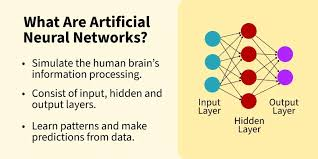

### ***2.1 FORWARD PROPOGATION***
> `[DATA] -> INPUT LAYER -> HIDDEN LAYERS -> OUTPUT LAYER -> [OUTPUT] `
* In forward Propogation the data is fed to the Input layers initially. Then it passes through the hidden layers.
* The hidden layers consist of many neurons. Each neurons has its own set of weights and biases. The data that passes into those neurons are then computed on. The weighted sums and bias added. `Z = W.X + b`. Then this result is passed through an activation function. These are non linear activation functions.
* Then the output of the first hidden layer is passed to second and so on...the process continues until we reach to the end of hidden layers.
* Now as we come to the output layer, before outputting, the data recieved is passed through the output activation function -
1. Softmax (for multi-class classification)
2. Sigmoid (for binary classification)
3. Linear (for regression tasks)

And then we get the output for the first epoch.

### ***2.2 BACKWARD PROPOGATION***
`[OUTPUT ERROR] <- OUTPUT LAYER <- HIDDEN LAYERS <- INPUT LAYER <- [DATA]`

* In Backpropagation, the process starts from the output, after the forward pass has produced a prediction.
* We first calculate the error by comparing the predicted output with the actual label using a loss function (e.g., Cross-Entropy, MSE).
* This error is then used to calculate the gradient at the output layer — how much the output contributed to the error.
* We now move backward layer-by-layer. Each neuron in the output and hidden layers uses the chain rule to compute:
  1. How much its weights and biases contributed to the final error.
  2. This involves computing partial derivatives like:

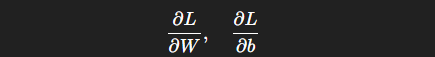

* These gradients are then passed backward through the network:
  1. Starting from the output layer to the last hidden layer
  2. Then from each hidden layer to the previous one

Until we reach back to the input layer
* At each neuron during backprop, we compute:
  1. Gradient of the loss with respect to the output of the neuron
  2. Gradient of the activation function (like ReLU, sigmoid, etc.)
  3. Use the chain rule to combine them and compute how much to adjust each weight

Once all gradients are computed, we update weights and biases using:
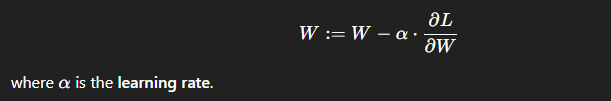


This completes one epoch of training. The process repeats with new data in the next epoch — each time improving the network by reducing the loss.

### ***2.3 NEURAL NETWORKS USING PYTORCH***

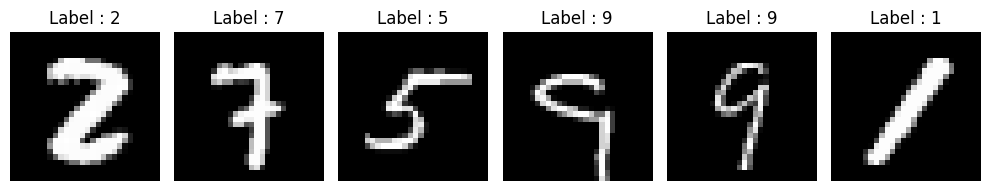

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

batch_size = 64

# DATASET -
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               download=True,
                               transform=transform)
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              download=True,
                              transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
show_samples()

#### ***2.3.1 MODEL CLASS***
**CODE EXPLANATION:**
1. `class NeuralNetwork(nn.Module)` - We create a NeuralNetwork class which inherits from nn.Module - the base class for neural networks
2. `super(<className>, self).__init__()` - This line initializes the parent class (nn.Module). It's required to make the custom model work with PyTorch internals like .parameters(), .to(), .eval() etc.
3. `self.hiddenLayer1 = nn.Linear(28*28, 512)` - This creates a fully connected (dense) layer that maps a 784-dimensional input (28×28) to a 512-dimensional hidden layer.
> Input image → flatten → feed 784 numbers → 512 output values from neurons
4. `self.outputLayer = nn.Linear(512, 10)` - This maps the 512 hidden features to 10 output neurons, each representing a digit (0–9). So the final output is a logit vector of size 10.
5. `X = X.view(-1, 28*28)` - This flattens the 2D image (shape [batch_size, 1, 28, 28]) into a 1D vector [batch_size, 784]. The -1 lets PyTorch infer the batch size dynamically. ***nn expects 1D vectors not 2D images***
6. `X = nn.functional.relu(self.hiddenLayer1(X))` - Here we insert the value we get from the hidden layers into the hidden layer activation functions. In this case relu
7. `X = self.outputLayer(X)` - No activation applied right now as output activations like softmax or sigmoid are often added during loss computation

In [ ]:
## Let's build the model
torch.manual_seed(101)
batch_size = 64
num_epochs = 10
learning_rate = 0.01

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.hiddenLayer1 = nn.Linear(28*28, 512)
    self.outputLayer = nn.Linear(512, 10)

  def forward(self, X):
    X = X.view(-1, 28*28) # Flattens the image
    X = nn.functional.relu(self.hiddenLayer1(X)) #  passing output of hidden layers to the activation fn before sending to next hidden layer / output layer
    X = self.outputLayer(X)
    return X

**`Q.` WHAT IS RELU ACTIVATION?**
*The ReLU function is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero.*

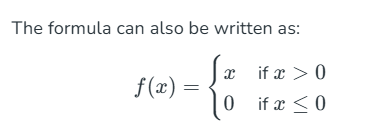


> 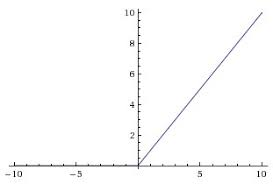


**`Q.` Why Use Relu?**

***One question that comes in mind is why use the relu activation. Whatever data the neuron computes by z = WX + b, we basically do relu(z) and turn all the negatives to 0. Why turn them to 0 and does turing them to 0 not mean loss of information??***
> *Here is the answer. This is not too mathematical right now but works fine!*
> 1. Basically the main aim of neural networks is to bring in non linearity. If we dont change the values to 0 if negative and same if positive, we are basically just multiplying matrices one after another in each layer. By doing what relu does, we provide non linearity in the model which is essential for neural networks. It helps complex patterns to emerge.
> 2. What Relu does is it makes the positive output more significant and negaive insignificant. It is just like *Fire a neuron only if it has something positive to say.* The thing is that the negative values don't tend to contribute a lot to the output. Hence in order to provide `Better Generalization` and `Reduce Overfitting` we do this.

**`Q.` What even is the requirment of non linearity**

***Another question that comes in mind is why even use activation functions. What even is use of introducing non linearity...what if we don't?***
> *Here is the answer*
> 1. If there is no activation functions, no matter even if we stack 100 layers of 1000 layers...it's still glorified Linear Regression as it tones down to the simple equation of z' = W'x' + b'.
> 2. Non Linearity is what makes neural networks Neural Networks. Not a solid point but an intuitive one! In layman terms, conventional linear models like Linear Regression essentially draw a straight line which is the boundary. Neural Networks draw curved ones. Curved ones are required for advanced stuff such as hand written digits and etc. That is possible due to non - linearity

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork().to(device)
# Instantiates our model and moves the model params to the device (gpu/cpu)
# If we forget the .to(device), we stay on cpu anyhow

#### ***2.3.2 MODEL OPTIMIZER AND LOSS FUNCTION***
1. `optimizer => optim.SGD(model.parameters(), lr=learning_rate)`
> What is optimizer? An optimizer is an algorithm that updates your model’s weights using the gradients computed from loss.
> When you train a neural network:
> * You make predictions
> * You calculate a loss — how wrong were you?
> * You call .backward() — PyTorch calculates the gradients (∂Loss/∂Weights)
> * You call optimizer.step() — and that’s where the optimizer comes in
> -> The optimizer looks at the gradients, then adjusts the weights to hopefully reduce the loss next time.

> **`note - ` The Optimizer might not always change the weights beneficially**
> What I mean to say is that we may think optimizer changes the weights after seeing the accuracy. This means in each subsequent epochs, we are bound to get completely better results. But in some cases that might not happen. Cases are -
> 1. Learning rate is too high. The optimizer jumps and the weights get updated in a bad manner or in the not most optimal way. This causes less accuracy or results.
> 2. In some multidimensional loss curves, there are a lot of local minimas too. Sometimes the optimizer might genralize well locally and not globally.

**Remember Neural Networks are Non Convex Problems**

2. `Loss Function => criterion = nn.CrossEntropyLoss()`
> Before learning about Loss Functions, let's look at some basic stuff
> * `LOGITS : ` Logits are the raw output values that the output layer recieves from the previous layers. These are not probabiilites just a number. A RAW NUMBER.
> * `GETTING PROBABILITIES : ` We are talking specifically about classification tasks here. Suppose our logits are - **[2.1, 0.5, -1.0]**. We then apply the output activation to these logits. Suppose we apply Softmax, the probs are - **[0.79, 0.18, 0.03]**. This tells us class 0 has the highest probability.
> * `Loss : ` And how to get the loss? Class 0 is the predicted probability.
>   * Suppose the real label is class 0, `loss = log(p_class0)`
>   * Suppose the real label is some other class, `loss = log(p_thatclass)`
>  * So why is the loss accurate? because remember any number that is closer to 1 has its log 0. The highest probability is obv the closest to one, so it, if is the real label, will have lowest loss.

In [ ]:
# We use CrossEntropy loss and SGD. Remember this is a multiclass classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

#### ***2.3.3 ACCURACY FUNCTION***
1. `outputs` - The outputs contains the probability of [num_classes]. If num_classes = 3,
```python
outputs = tensor([
    [1.2, 2.5, 0.3],  # → model guesses class 1 (2.5 is max)
    [0.1, 0.2, 0.9]   # → model guesses class 2
])
```
So we will have 9 values in each array.

2. `_, preds = torch.max(outputs, 1)` returns the tuple (value, index). It returns the highest probabilities. Now we need index only as that would be the number.

3. `torch.sum(preds == labels)` Counts how many predictions were correct.

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, 1)
  return torch.sum(preds == labels).item() / len(labels)

#### ***2.3.4 TRAINING LOOP***
***This is outside your NeuralNetwork class because:***
1. `Modularity:` You might reuse the same model for different datasets.
2. `Flexibility:` You may want different training loops (e.g., for contrastive learning, GANs, etc.)
3. `PyTorch's Design Philosophy:` Keeps model and training logic decoupled — just like model is about what to do, and the loop is about when and how to do it.

In [ ]:
def train(model, device, train_dataset, criterion, optimizer, epoch):
  model.train()
  running_loss = 0.0
  running_accuracy = 0.0
  for i, (inputs, labels) in enumerate(train_dataset):
    inputs, labels = inputs.to(device), labels.to(device) # Moves data labels to GPU if available hence CPU
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward() # Computes gradients of loss w.r.t. each model parameter using backpropagation.
    optimizer.step()  # Actually updates the model parameters using those gradients (based on optimizer rules like SGD).

    running_loss += loss.item()
    running_accuracy += accuracy(outputs, labels)
    if (i + 1) % 200 == 0:
            print(f'Epoch {epoch}, Batch {i+1}, Loss: {running_loss / 200:.4f}, Accuracy: {running_accuracy / 200:.4f}')
            running_loss = 0.0
            running_acc = 0.0

#### ***2.3.5 TESTING LOOP***

In [ ]:
def test(model, device, test_dataset, criterion):
  model.eval()
  test_loss = 0.0
  test_accuracy = 0.0
  with torch.no_grad():
    for inputs, labels in test_dataset:
            inputs, labels = inputs.to(device), labels.to(device) # Moves data labels to GPU if available hence CPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            test_accuracy += accuracy(outputs, labels)
    print(f'Test Loss: {test_loss / len(test_dataset):.4f}, Test Accuracy: {test_accuracy / len(test_dataset):.4f}')

> `In the below cell`
> That train → test → train → test pattern is there so you can monitor your model’s performance after every epoch instead of waiting until the very end.

> By this we can have -
> * `EARLY STOPPING` -> If the losses begin to increase means overfitting starts happening, we could reduce the number of epochs or stop model beforehand.
> * `HYPERPARAMETER TUNING` -> Gives us a better understanding of different params of our model.

In [ ]:
for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, criterion, optimizer, epoch)
    test(model, device, test_loader, criterion)

Epoch 1, Batch 200, Loss: 2.0298, Accuracy: 0.5329
Epoch 1, Batch 400, Loss: 1.3919, Accuracy: 1.3058
Epoch 1, Batch 600, Loss: 0.9369, Accuracy: 2.1236
Epoch 1, Batch 800, Loss: 0.7102, Accuracy: 2.9687
Test Loss: 0.5586, Test Accuracy: 0.8682
Epoch 2, Batch 200, Loss: 0.5470, Accuracy: 0.8675
Epoch 2, Batch 400, Loss: 0.5098, Accuracy: 1.7341
Epoch 2, Batch 600, Loss: 0.4605, Accuracy: 2.6154
Epoch 2, Batch 800, Loss: 0.4384, Accuracy: 3.4994
Test Loss: 0.3936, Test Accuracy: 0.8952
Epoch 3, Batch 200, Loss: 0.4153, Accuracy: 0.8880
Epoch 3, Batch 400, Loss: 0.3931, Accuracy: 1.7797
Epoch 3, Batch 600, Loss: 0.3860, Accuracy: 2.6744
Epoch 3, Batch 800, Loss: 0.3657, Accuracy: 3.5747
Test Loss: 0.3443, Test Accuracy: 0.9061
Epoch 4, Batch 200, Loss: 0.3579, Accuracy: 0.8973
Epoch 4, Batch 400, Loss: 0.3554, Accuracy: 1.7955
Epoch 4, Batch 600, Loss: 0.3513, Accuracy: 2.6972
Epoch 4, Batch 800, Loss: 0.3203, Accuracy: 3.6110
Test Loss: 0.3159, Test Accuracy: 0.9116
Epoch 5, Batch 200, 

`so after these models the model is completely trained. Now we can enter any unknown sample too`